#### Problem Statement


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.


#### Business Goal

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Reading the data


In [2]:
df = pd.read_csv('Car_price_data.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 26)

data has 205 rows, 26 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
## dropping the car_id column as it's not relevant in my analysis

df = df.drop(columns='car_ID', axis=1)
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#checking for null values

df.isnull().sum()


symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Awesome! we have no null values

### EDA

In [8]:
## extracting numeric and categorical columns from data frame

numeric_cols=[col for col in df if df[col].dtype !="object" ]
categorical_cols=[col for col in df if df[col].dtype=="object" ]

In [9]:
numeric_cols

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [10]:
categorical_cols

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [11]:
##removing car name column as it's not relevant in my analysis

categorical_cols.remove('CarName')

In [12]:
categorical_cols

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

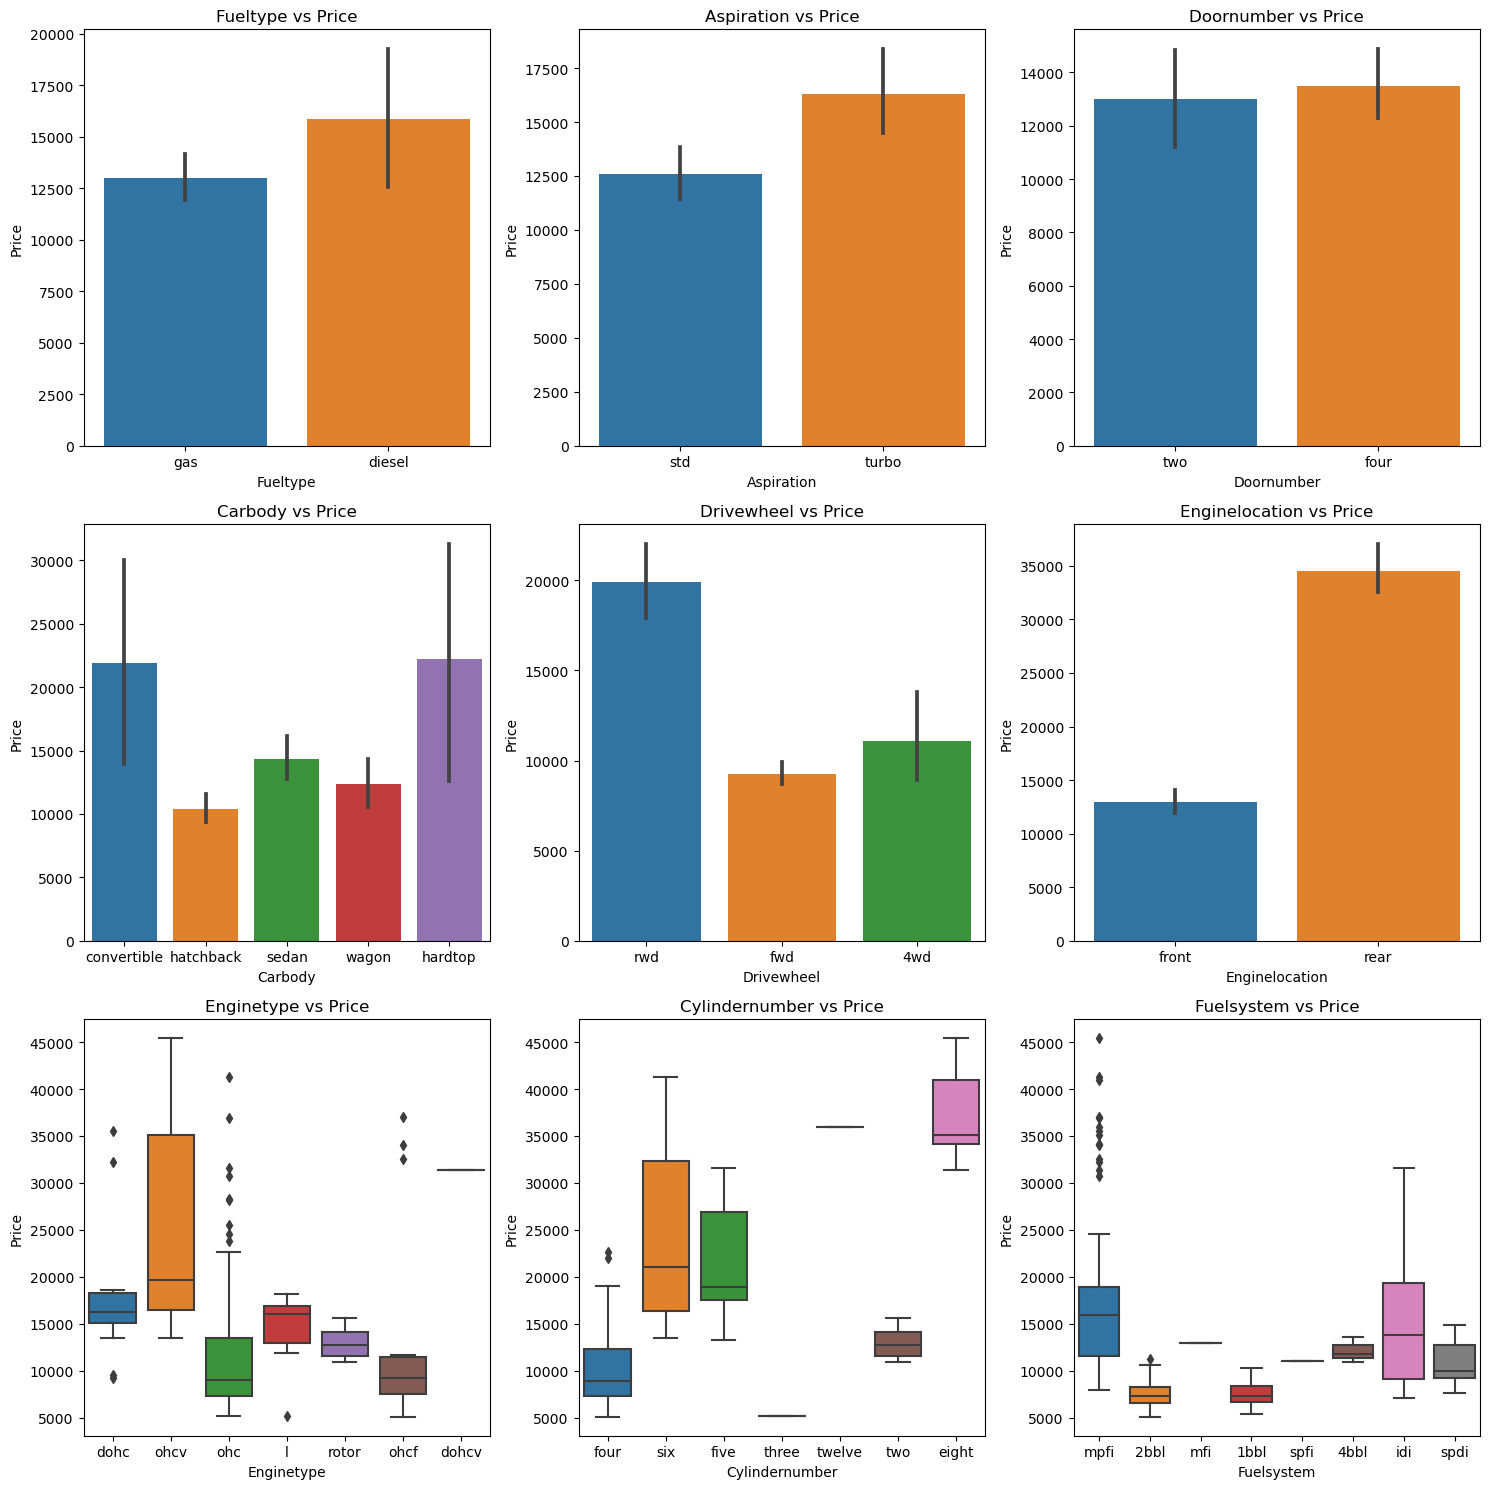

In [13]:
# Setting up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten axes to easily access each subplot
axes = axes.flatten()

# Plotting
for i, col in enumerate(categorical_cols):
    if df[col].nunique() > 5:  # Use box plot for bivariate
        sns.boxplot(x=col, y='price', data=df, ax=axes[i])
    else:  # Use bar plot for univariate
        sns.barplot(x=col, y='price', data=df, ax=axes[i])
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'{col.capitalize()} vs Price')

# Adjust layout
plt.tight_layout()
plt.show()

After plotting these charts, we can observe the distribution of car prices among different categorical variables. The bar plots provide insights into how the average price varies across different categories within each variable, offering a clear visualization of the price distribution. Meanwhile, the box plots illustrate the spread of prices within each category, highlighting any potential variations or outliers in the data. By analyzing these visualizations, we can gain valuable insights into how each categorical variable influences the pricing of cars in our dataset.







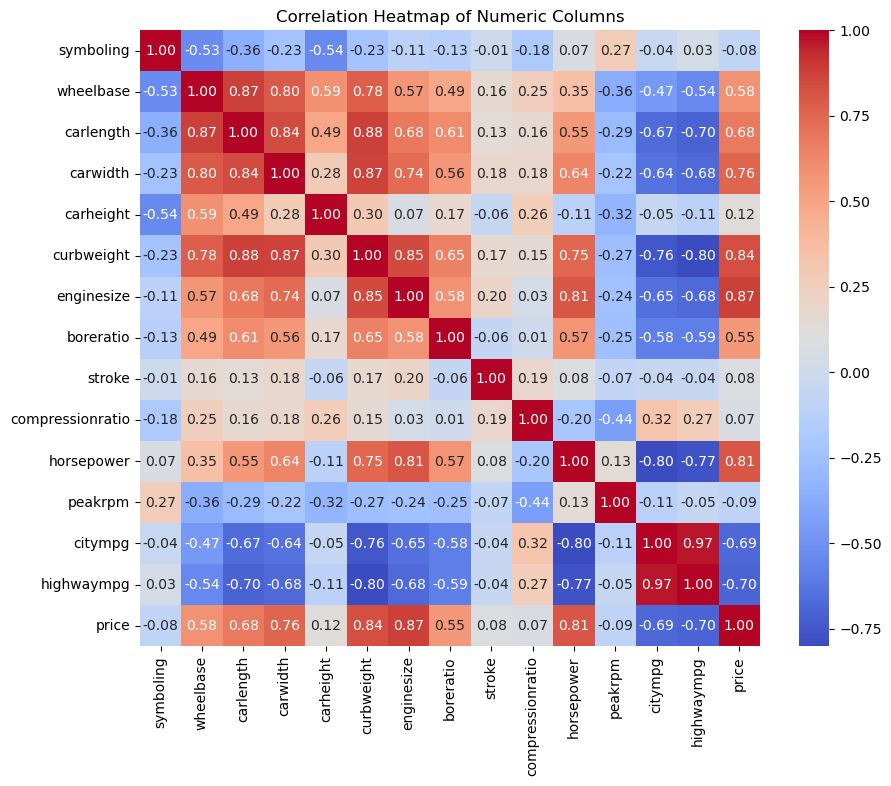

In [14]:
#ploting a heat map of numerical variables

corr_matrix=df[numeric_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


We can observe that some attributes like 'horsepower', 'enginesize' , 'curbweight' have very high correlations of over 0.8 with the price indicating that as these attributes increases, prices also increases. Some attributes like 'citympg', 'symboling', and 'peakrpm' show weak correlations with car price, indicating they may have less direct impact on price.

### Machine Learning

In [15]:
#importing libraries

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline


#### Feature Enginering


In [16]:
categorical_col = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarName']

In [17]:
#enconding categorical variables with lable encoder

label_encoder=LabelEncoder()
for col in categorical_col:
    df[col]=label_encoder.fit_transform(df[col])

In [18]:
#use scaler to standardize  the numerical columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [19]:
#defining my features and target

x = df.drop('price',axis =1)
y = df['price']

In [20]:
x


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,2,1,0,1,0,2,0,-1.690772,-0.426521,...,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,3,1,0,1,0,2,0,-1.690772,-0.426521,...,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,1,1,0,1,2,2,0,-0.708596,-0.231513,...,3,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,4,1,0,0,3,1,0,0.173698,0.207256,...,2,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,5,1,0,0,3,0,0,0.107110,0.207256,...,1,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,139,1,0,0,3,2,0,1.721873,1.198549,...,2,0.339248,5,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,138,1,1,0,3,2,0,1.721873,1.198549,...,2,0.339248,5,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,140,1,0,0,3,2,0,1.721873,1.198549,...,3,1.109571,5,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,142,0,1,0,3,2,0,1.721873,1.198549,...,3,0.435538,3,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


In [21]:
##splitting the data into train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Linear Regression

In [22]:
#initializing the model and fitting the model

Lin_model = LinearRegression()
Lin_model.fit(x_train, y_train)



LinearRegression()

In [23]:
### Making predictions

y_pred=Lin_model.predict(x_test)
y_pred

array([ 1.55300027,  0.54233211, -0.45266389,  0.03248274,  1.66276502,
       -0.87261324, -0.5995932 , -0.94144296, -0.47142553, -0.79975493,
        0.06616313, -0.91926776,  0.42700637, -0.35685535,  3.36994645,
       -0.83777171, -1.67234875,  0.13667967, -0.45527401, -0.35426359,
       -0.27281353,  0.97617921, -0.66863053, -1.26002268, -0.69756064,
        1.40151485,  0.09375961,  0.31889919, -1.0072884 ,  0.36623939,
        1.66538798, -0.77624287, -1.09802805,  1.10426139, -0.6305327 ,
        1.69551849, -0.40287964, -0.43999727, -0.80879391,  0.17363922,
       -0.73296576])

#### Evaluating the Model

In [24]:


print(f"Model score on training data: {Lin_model.score(x_train, y_train)}")
print(f"Model score on test data: {Lin_model.score(x_test, y_test)}")

Model score on training data: 0.9095056138704457
Model score on test data: 0.8407071151499278


In [25]:
mse = mean_squared_error(y_test, y_pred)
mse

0.19800243293837833

A score of 0.91 on the training data means our model explains about 91% of the differences in the prices of cars based on the features we've used. This means our model understands most of the patterns in the data it was trained on.

On the test data, our model got a score of 0.84 which is around 84% of the price differences in new, unseen cars. So, our model is doing a great job even on data it hasn't seen before.

Overall, with high R-squared scores on both training and test data, our linear regression model fits the data well and makes good predictions. But, we should also check other measures to be sure our model is reliable.

A mean squared error (MSE) of approximately 0.198 indicates that, on average, the model's predictions deviate from the actual values by a squared error of 0.198 units.

#### Comparing the model's predictions and the actual ground values

In [26]:
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


Actual: 2.1938180248748984, Predicted: 1.5530002742570685
Actual: 0.5750105295347381, Predicted: 0.5423321144058795
Actual: -0.46775629235408545, Predicted: -0.4526638894028785
Actual: -0.17902485564936185, Predicted: 0.03248273591398454
Actual: 1.8786101287417973, Predicted: 1.6627650188370717
Actual: -0.6873477805041359, Predicted: -0.8726132423223948
Actual: -0.688728069858222, Predicted: -0.5995931976247847
Actual: -0.5042712198121796, Predicted: -0.9414429596947017
Actual: -0.38631922046300954, Predicted: -0.4714255260595811
Actual: -0.690359320913051, Predicted: -0.799754934475887


#### Visualizing the Linear Regression Model's Prediction vs the actual values

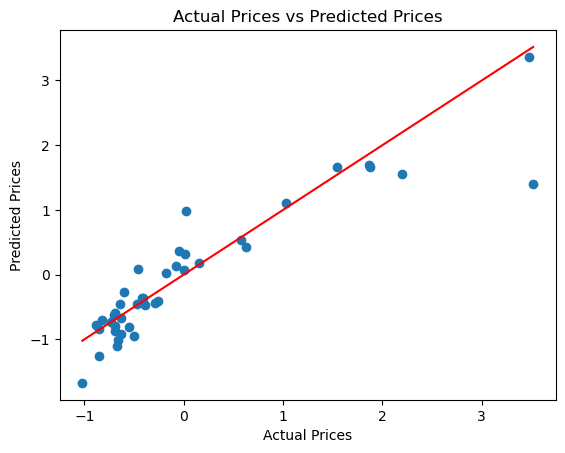

In [27]:

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()


### checking the features that affect price most

In [28]:
model = make_pipeline(StandardScaler(), Lin_model)
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

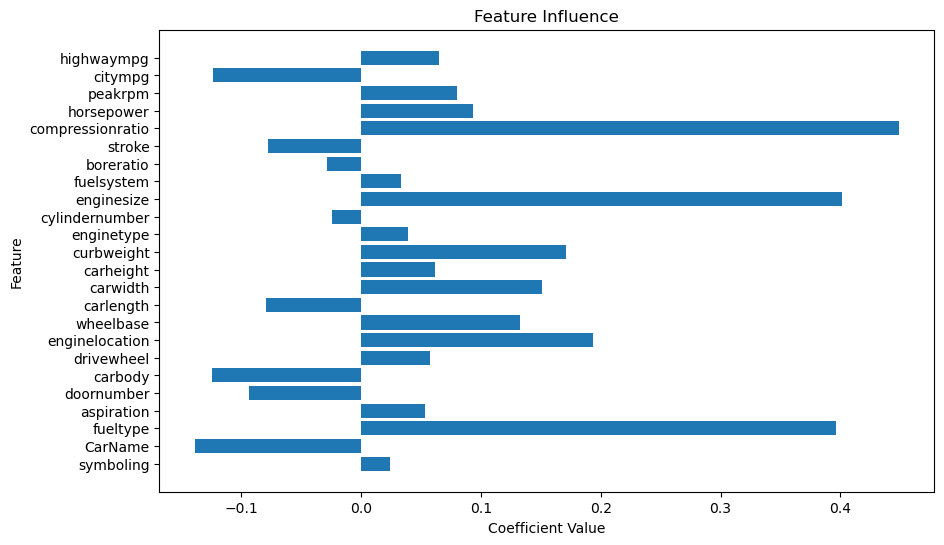

In [29]:

coefficients = Lin_model.coef_

plt.figure(figsize=(10, 6))
plt.barh(x.columns, coefficients) 
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Influence')
plt.show()


From this graph it can be obsreved that features like the 'enginesize', 'fueltype', 'curbweight', 'compression ratio' and a few others has higher influence on the pricing of cars,while the influence of the other features such as cylindernumber, symboling is minimal 

### Random Forest Regressor

In [37]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
#making predictions

y_pred=RF.predict(x_test)
y_pred

array([ 2.90136376,  0.69778639, -0.53336521, -0.02112101,  1.78685979,
       -0.81621661, -0.66299383, -0.66946676, -0.48122415, -0.63883061,
        0.04494591, -0.69485154,  0.12204888, -0.30304636,  3.53429042,
       -0.8493925 , -0.94119554,  0.12982869, -0.60819697, -0.52768595,
       -0.36001969,  0.26434416, -0.81786543, -0.92219147, -0.76226236,
        2.87689437, -0.50784742,  0.41184941, -0.75691687,  0.37619905,
        1.77960574, -0.84176075, -0.69064793,  0.74671388, -0.64973615,
        1.75972832, -0.41699427, -0.14283367, -0.72226283,  0.1893543 ,
       -0.62665395])

#### Evaluating the model

In [39]:
print(f"Model score on training data: {RF.score(x_train, y_train)}")
print(f"Model score on test data: {RF.score(x_test, y_test)}")

Model score on training data: 0.9865947122093917
Model score on test data: 0.9586353799668488


In [40]:
mse = mean_squared_error(y_test, y_pred)
mse

0.05141658029386744

The Random Forest Regressor model exhibits strong performance on both the training and test datasets, with R2 scores of approximately 98.71% and 95.86%, respectively. These scores indicate that the model captures a significant portion of the variance in the target variable, demonstrating its ability to generalize well to unseen data.

Moreover, the mean squared error (MSE) of approximately 0.0514 suggests that the model's predictions are relatively close to the actual values on average, indicating good predictive accuracy.

#### Comparing the model's predictions and the actual ground values

In [41]:
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


Actual: 2.1938180248748984, Predicted: 2.9013637588431735
Actual: 0.5750105295347381, Predicted: 0.6977863892147379
Actual: -0.46775629235408545, Predicted: -0.5333652097793056
Actual: -0.17902485564936185, Predicted: -0.021121008350423538
Actual: 1.8786101287417973, Predicted: 1.7868597857586928
Actual: -0.6873477805041359, Predicted: -0.8162166138356228
Actual: -0.688728069858222, Predicted: -0.6629938296597913
Actual: -0.5042712198121796, Predicted: -0.6694667593262027
Actual: -0.38631922046300954, Predicted: -0.481224152024454
Actual: -0.690359320913051, Predicted: -0.6388306097080112


#### Visualizing the Linear Regression Model's Prediction vs the actual values

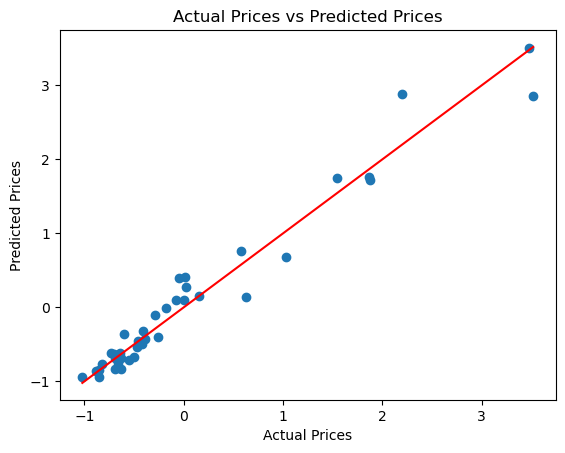

In [35]:
plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()


### checking the features that affect price most with this model

In [42]:
model = make_pipeline(StandardScaler(), RF)
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

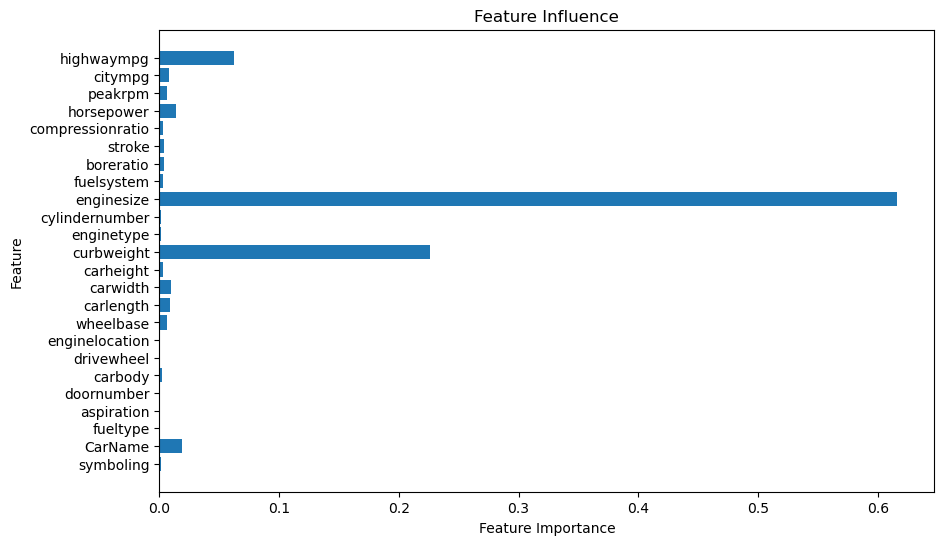

In [43]:


feature_importances = RF.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(x.columns, feature_importances) 
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Influence')
plt.show()


From this graph it can be observed features like enginesize and curbweight influence price more

#### Conclusion

The Linear Regression model achieved an R2 score of approximately 84% and a mean squared error (MSE) of approximately 1.98 on the test data. On the other hand, the Random Forest model outperformed the Linear Regression model with an R2 score of approximately 96% and a lower MSE of approximately 0.0514.

These results suggest that the Random Forest model provides a better fit to the data and yields more accurate predictions compared to the Linear Regression model, as indicated by its higher R2 score and lower MSE. Therefore, the Random Forest model may be preferred for this regression task.

Additionally, the feature importance analysis suggests that the Random Forest model identifies certain features like 'enginesize' and 'curbweight' as significant predictors of car prices, which aligns with our intuition about the factors influencing car pricing.

Therefore, we can conclude that the Random Forest regression model is more suitable for predicting car prices based on the provided dataset, as it offers better predictive accuracy and identifies key features that impact pricing effectively.